## 1. Prepare the data

1. download the openbeer database from https://openbeerdb.com/, "openbeerdb_csv.zip". (You may assemble the link before. But the idea is that after publishing a notebook/code it works as a standalone solution and no further interactions are needed from the user)
1. unzip the csv in Python

In [1]:
import requests
import zipfile

# standalone download/upload in jupyter notebook of csv-files
print('Start downloading beer data file...')
url = 'https://openbeerdb.com/files/openbeerdb_csv.zip'
pathZip = 'openbeerdb_csv.zip'

file = requests.get(url)

open(pathZip, 'wb').write(file.content)

print('Download successful...')

# extract the zip in your directory
extract_path = './'
with zipfile.ZipFile(pathZip, 'r') as zipRef:
    zipRef.extractall(extract_path)
print('ZipFile extracted successfull...')


Start downloading beer data file...
Download successful...
ZipFile extracted successfull...


## 2. Read the data into a class that allows data processing

1. Which package is well suited and why?
1. Read the data into this package
1. Create a "Qualitative Summary" of the data.
1. Access the column "brewery_id" from beers dataframe
1. Access first row of beers and its corresponding brewery row
1. Join beers data with brewery data and print result of first beer row from 5.


In [2]:
# Import pandas, which is a great package to process data
import pandas as pd
from IPython.display import display

# IMPORTANT: Run SolutionExample_1 first

basePath = 'openbeerdb_csv/'

In [3]:
### 2. Read data

In [46]:
# beers.csv
print('beers.csv')
beers = pd.read_csv(basePath + "beers.csv", header=0, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8])
beers.head()

beers.csv


C:\Users\cmu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc
0,1,812,Hocus Pocus,11,116,4.5,0,0,0
1,2,264,Grimbergen Blonde,-1,-1,6.7,0,0,0
2,3,779,Widdershins Barleywine,-1,-1,9.1,0,0,0
3,4,287,Lucifer,-1,-1,8.5,0,0,0
4,5,1056,Bitter,-1,-1,4,0,0,0


In [5]:
# breweries.csv
print('breweries.csv')
breweries = pd.read_csv(basePath + "breweries.csv", header=0)
breweries.head()

breweries.csv


,id,name,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod
0,1,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,2,21st Amendment Brewery Cafe,563 Second Street,NaN,San Francisco,California,94107,United States,1-415-369-0900,http://www.21st-amendment.com/,NaN,The 21st Amendment Brewery offers a variety of...,2010-10-24 13:54:07
2,3,3 Fonteinen Brouwerij Ambachtelijke Geuzestekerij,Hoogstraat 2A,NaN,Beersel,Vlaams Brabant,NaN,Belgium,32-02-/-306-71-03,http://www.3fonteinen.be/index.htm,NaN,NaN,2010-07-22 20:00:20
3,4,Aass Brewery,Ole Steensgt. 10 Postboks 1530,NaN,Drammen,NaN,NaN,Norway,47-32-26-60-00,http://www.aass.no,NaN,Aass Brewery was established in 1834 and is th...,2010-07-22 20:00:20
4,5,Abbaye de Leffe,Dinant,NaN,Dinant,Namur,NaN,Belgium,NaN,NaN,NaN,NaN,2010-07-22 20:00:20


In [6]:
# breweries_geocode.csv
print('breweries_geocode.csv')
breweries_geocode = pd.read_csv(basePath + "breweries_geocode.csv", header=0)
breweries_geocode.head()

breweries_geocode.csv


,id,brewery_id,latitude,longitude,accuracy
0,1,1,30.2234,-97.7697,ROOFTOP
1,2,2,37.7825,-122.3930,ROOFTOP
2,3,3,50.7668,4.3081,RANGE_INTERPOLATED
3,4,4,59.7451,10.2135,APPROXIMATE
4,5,5,50.2606,4.9122,APPROXIMATE


In [7]:
# categories.csv
print('categories.csv')
categories = pd.read_csv(basePath + "categories.csv", header=0)
categories.head()

categories.csv


,id,cat_name,last_mod
0,1,British Ale,2010-10-24 13:50:10
1,2,Irish Ale,2010-06-08 00:00:00
2,3,North American Ale,2010-06-08 00:00:00
3,4,German Ale,2010-06-08 00:00:00
4,5,Belgian and French Ale,2010-06-08 00:00:00


In [8]:
# styles.csv
print('styles.csv')
styles = pd.read_csv(basePath + "styles.csv", header=0)
styles.head()

styles.csv


,id,cat_id,style_name,last_mod
0,1,1,Classic English-Style Pale Ale,2010-10-24 13:53:31
1,2,1,English-Style India Pale Ale,2010-06-15 19:14:38
2,3,1,Ordinary Bitter,2010-06-15 19:14:54
3,4,1,Special Bitter or Best Bitter,2010-06-15 19:15:02
4,5,1,Extra Special Bitter,2010-06-15 19:15:09


### 3. "Qualitative Summary"

In [9]:
print('beers.csv')
beers.describe()

beers.csv


,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc
count,5845,5837,5837,5832,5829,5825.0,5822,5822,5822
unique,5845,1650,4982,28,129,266.0,20,15,5
top,3286,1072,Pale Ale,3,-1,0.0,0,0,0
freq,1,47,48,1248,1046,2648.0,4803,4809,4816


In [10]:
print('breweries.csv')
breweries.describe()

breweries.csv


,id
count,1414.000000
mean,713.725601
std,410.477463
min,1.000000
25%,359.250000
50%,715.500000
75%,1068.750000
max,1423.000000


In [11]:
print('breweries_geocode.csv')
breweries_geocode.describe()

breweries_geocode.csv


,id,brewery_id,latitude,longitude
count,1304.000000,1304.000000,1304.000000,1304.000000
mean,657.648006,699.611196,41.473073,-63.765908
std,379.382053,400.565205,12.959051,58.324611
min,1.000000,1.000000,-45.872000,-157.858000
25%,328.750000,353.500000,38.973475,-105.139500
50%,658.500000,703.500000,42.504450,-83.819250
75%,985.250000,1046.250000,48.149975,-1.260825
max,1315.000000,1394.000000,64.958300,176.854000


In [12]:
print('categories.csv')
categories.describe()

categories.csv


,id
count,11.000000
mean,6.000000
std,3.316625
min,1.000000
25%,3.500000
50%,6.000000
75%,8.500000
max,11.000000


In [13]:
print('styles.csv')
styles.describe()

styles.csv


,id,cat_id
count,141.000000,141.000000
mean,71.000000,5.900709
std,40.847277,3.505720
min,1.000000,1.000000
25%,36.000000,3.000000
50%,71.000000,5.000000
75%,106.000000,9.000000
max,141.000000,11.000000


### 4. Access the column "brewery_id" from beers dataframe

In [14]:
beers['brewery_id']

0        812
1        264
2        779
3        287
4       1056
        ... 
5856      10
5857      10
5858      10
5859    1422
5860    1423
Name: brewery_id, Length: 5861, dtype: object

### 5. Access first row of beers and its corresponding brewery row

In [15]:
beers.loc[0, :]

id                      1
brewery_id            812
name          Hocus Pocus
cat_id                 11
style_id              116
abv                   4.5
ibu                     0
srm                     0
upc                     0
Name: 0, dtype: object

In [16]:
# access brewery row with id = 812 (id not index ;-))
breweries.set_index('id').loc[812, :]

name                                                Magic Hat
address1                                  5 Bartlett Bay Road
address2                                                  NaN
city                                         South Burlington
state                                                 Vermont
code                                                     5403
country                                         United States
phone                                          1-802-658-2739
website                              http://www.magichat.net/
filepath                                                  NaN
descript    Burlington microbrewers of Humble Patience, Fa...
last_mod                                  2010-07-22 20:00:20
Name: 812, dtype: object

### 6. Join beers data with brewery data and print result of first beer row from 5.

In [17]:
joined = beers.set_index('brewery_id').join(breweries.set_index('id'), lsuffix='_beer', rsuffix='_brewery') # column name is in both data sets
joined = joined.iloc[1:] # drops the first row, because we also matched the header
joined.head()

,id,name_beer,cat_id,style_id,abv,ibu,srm,upc,name_brewery,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod
1,5735,(512) Wit,5,67,5.2,0,0,0,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,5736,(512) Pale,3,26,5.8,0,0,0,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,5737,(512) IPA,3,31,7,0,0,0,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,5738,(512) Pecan Porter,2,25,6.8,0,0,0,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,5739,(512) ALT,4,57,6,0,0,0,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20


In [18]:
# print our famous beer
joined[joined['id'] == 1]

,id,name_beer,cat_id,style_id,abv,ibu,srm,upc,name_brewery,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod
812,1,Hocus Pocus,11,116,4.5,0,0,0,Magic Hat,5 Bartlett Bay Road,NaN,South Burlington,Vermont,5403,United States,1-802-658-2739,http://www.magichat.net/,NaN,"Burlington microbrewers of Humble Patience, Fa...",2010-07-22 20:00:20


## 3. Reading the data into a local database

1. Which database is well suited and why?
1. Read the data into this database

### 1. Which database is well suited

With python you can easily use sqlite as a database. It is easy to use and you can then query the database with SQL-commands to answer e.g. certain questions on the data. <br/>
https://docs.python.org/3/library/sqlite3.html

### 2. Read the data into this database

In [19]:
import sqlite3

beers_data = pd.DataFrame(beers, columns=["id","brewery_id","name","cat_id","style_id","abv"])
breweries_data = pd.DataFrame(breweries, columns=["id","name","city","country"])
categories_data = pd.DataFrame(categories, columns=["id","cat_name"])
styles_data = pd.DataFrame(styles, columns=["id","cat_id","style_name"])

conn = sqlite3.connect('beer.db')

# Create table
conn.execute('DROP TABLE IF EXISTS beers')
conn.execute('''CREATE TABLE beers
             (id INTEGER, brewery_id INTEGER,name TEXT,cat_id INTEGER,style_id INTEGER,abv REAL)''')

conn.execute('DROP TABLE IF EXISTS breweries')
conn.execute('''CREATE TABLE breweries
             (id INTEGER, name TEXT, city TEXT, country TEXT)''')

conn.execute('DROP TABLE IF EXISTS categories')
conn.execute('''CREATE TABLE categories
             (id INTEGER, cat_name TEXT)''')

conn.execute('DROP TABLE IF EXISTS styles')
conn.execute('''CREATE TABLE styles
             (id INTEGER, cat_id INTEGER, style_name TEXT)''')

# Insert a beer data
beers_data.to_sql('beers', conn, if_exists='replace', index = False)
breweries_data.to_sql('breweries', conn, if_exists='replace', index = False)
categories_data.to_sql('categories', conn, if_exists='replace', index = False)
styles_data.to_sql('styles', conn, if_exists='replace', index = False)


# Save (commit) the changes
conn.commit()

# read data
c = conn.cursor()
c.execute('''SELECT * FROM beers b 
                LEFT JOIN breweries bw ON b.brewery_id = bw.id 
                LEFT JOIN categories c ON b.cat_id = c.id 
                LEFT JOIN styles s ON b.style_id = s.id 
                ''')

for row in c.fetchall():
    print (row)

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
conn.close()

('1', '812', 'Hocus Pocus', '11', '116', '4.5', 812, 'Magic Hat', 'South Burlington', 'United States', 11, 'Other Style', 116, 11, 'Light American Wheat Ale or Lager')
('2', '264', 'Grimbergen Blonde', '-1', '-1', '6.7', 264, 'Brouwerij Alken-Maes', 'Jumet', 'Belgium', None, None, None, None, None)
('3', '779', 'Widdershins Barleywine', '-1', '-1', '9.1', 779, 'Left Hand Brewing Company', 'Longmont', 'United States', None, None, None, None, None)
('4', '287', 'Lucifer', '-1', '-1', '8.5', 287, 'Brouwerij Liefmans', 'Oudenaarde', 'Belgium', None, None, None, None, None)
('5', '1056', 'Bitter', '-1', '-1', '4.0', 1056, 'Ridgeway Brewing', 'South Stoke', 'United Kingdom', None, None, None, None, None)
('6', '1385', 'Winter Warmer', '1', '13', '5.2', 1385, 'Youngs & Company Brewery', 'London', 'England', 1, 'British Ale', 13, 1, 'Old Ale')
('7', '1099', 'Winter Welcome 2007-2008', '-1', '-1', '6.0', 1099, 'Samuel Smith Old Brewery (Tadcaster)', 'Tadcaster', 'United Kingdom', None, None, No

('1832', '1268', 'Winter Gale Spiced Ale', '-1', '-1', '0.0', 1268, 'Titletown Brewing', 'Green Bay', 'United States', None, None, None, None, None)
('1833', '205', 'Jahrhundert-Bier', '-1', '-1', '5.5', 205, 'Brauerei Aying Franz Inselkammer KG', 'Aying', 'Germany', None, None, None, None, None)
('1834', '972', 'Hacker-Pschorr Dunkel Weisse', '-1', '-1', '0.0', 972, 'Paulaner', 'Munich', 'Germany', None, None, None, None, None)
('1835', '972', 'Hacker-Pschorr Weisse', '4', '50', '0.0', 972, 'Paulaner', 'Munich', 'Germany', 4, 'German Ale', 50, 4, 'South German-Style Hefeweizen')
('1836', '173', 'PremiÃ¨re (Red)', '-1', '-1', '0.0', 173, "Brasserie de l'Abbaye de Scourmont (Trappistes)", 'Chimay-Forges', 'Belgium', None, None, None, None, None)
('1837', '305', 'Echte Kriek', '-1', '-1', '0.0', 305, 'Brouwerij Verhaeghe', 'Vichte', 'Belgium', None, None, None, None, None)
('1838', '525', 'Golden Lager', '8', '95', '0.0', 525, 'First Coast Brewing', 'Wilmington', 'United States', 8, 'Nor

('3331', '813', 'KrÃ¶lsch', '-1', '-1.0', '0.0', 813, 'Magnolia Pub and Brewery', 'San Francisco', 'United States', None, None, None, None, None)
('3332', '581', 'Frambosia', '11', '116.0', '0.0', 581, 'Golden Gate Park Brewery', 'San Francisco', 'United States', 11, 'Other Style', 116, 11, 'Light American Wheat Ale or Lager')
('3333', '581', 'Buffalo Nutty Brown', '3', '38.0', '0.0', 581, 'Golden Gate Park Brewery', 'San Francisco', 'United States', 3, 'North American Ale', 38, 3, 'American-Style Brown Ale')
('3334', '581', 'Celebration Red', '3', '33.0', '0.0', 581, 'Golden Gate Park Brewery', 'San Francisco', 'United States', 3, 'North American Ale', 33, 3, 'American-Style Amber/Red Ale')
('3335', '581', 'Four Sheets Cream Ale', '8', '95.0', '0.0', 581, 'Golden Gate Park Brewery', 'San Francisco', 'United States', 8, 'North American Lager', 95, 8, 'American-Style Lager')
('3336', '66', 'Amber Lager', '8', '95.0', '0.0', 66, 'Bad Frog Brewery Company', 'Rose City', 'United States', 8

('5448', '1173', '422 Pale Wheat Ale', '11.0', '116.0', '5.0', 1173, 'Southern Tier Brewing Co', 'Lakewood', 'United States', 11, 'Other Style', 116, 11, 'Light American Wheat Ale or Lager')
('5449', '587', 'Holy Mackerel Special Golden Ale', '5.0', '65.0', '8.5', 587, 'Gordash Brewing Company', 'Fort Lauderdale', 'United States', 5, 'Belgian and French Ale', 65, 5, 'Belgian-Style Pale Strong Ale')
('5450', '587', 'Holy Mackerel Mack In Black', '3.0', '30.0', '8.0', 587, 'Gordash Brewing Company', 'Fort Lauderdale', 'United States', 3, 'North American Ale', 30, 3, 'American-Style Strong Pale Ale')
('5451', '391', 'Huckleberry Ale', '11.0', '121.0', '3.5', 391, "Coeur d'Alene Brewing Company", "Coeur d'Alene", 'United States', 11, 'Other Style', 121, 11, 'Fruit Beer')
('5452', '1125', 'Sea Dog Raspberry Wheat Ale', '11.0', '116.0', '4.5', 1125, 'Sea Dog Brewing Company', 'Bangor', 'United States', 11, 'Other Style', 116, 11, 'Light American Wheat Ale or Lager')
('5453', '812', 'Wacko', 

## 4. Questions related to the data (use database from 3. to answer)

1. What is the average alcohol content of the beers produced by country of production?
1. How many breweries are there per country/city?
1. How many beer styles does a brewery brew on average? How many are there per country?
1. What is the median of the alcohol content?
1. Which beer style is mainly found in which country?

In [20]:
# open db and cursor
conn = sqlite3.connect('beer.db')
c = conn.cursor()

### 1. What is the average alcohol content of the beers produced by country of production?

In [21]:
c.execute('''SELECT bw.country, round(AVG(b.abv), 2) as 'abv' FROM beers b 
                LEFT JOIN breweries bw ON b.brewery_id = bw.id 
                WHERE bw.country <> 'None'
                GROUP BY bw.country ORDER BY abv DESC
                ''')

for row in c.fetchall():
    print (row)

('Sri Lanka', 8.4)
('Estonia', 7.8)
('Denmark', 7.07)
('Argentina', 6.5)
('Poland', 6.13)
('Latvia', 5.73)
('Lithuania', 5.7)
('Hungary', 5.58)
('England', 5.49)
('Belgium', 5.49)
('Norway', 5.47)
('Russia', 5.38)
('United Kingdom', 5.25)
('Netherlands', 5.22)
('France', 5.14)
('India', 5.01)
('Myanmar', 5.0)
('Mauritius', 5.0)
('Macedonia, the Former Yugoslav Republic of', 5.0)
('Greece', 5.0)
('French Polynesia', 5.0)
('Aruba', 5.0)
('Austria', 4.77)
('Finland', 4.73)
('Colombia', 4.7)
('Jamaica', 4.67)
('Ireland', 4.57)
('Italy', 4.38)
('Spain', 4.24)
('New Zealand', 4.15)
('Macao', 4.0)
('Sweden', 3.79)
('Australia', 3.77)
('United States', 3.15)
('Japan', 3.01)
('Korea, Republic of', 2.97)
('Germany', 2.87)
('Thailand', 2.5)
('Czech Republic', 2.34)
('Canada', 2.31)
('Mexico', 2.15)
('Brazil', 2.12)
('Philippines', 2.1)
('Switzerland', 2.0)
('Panama', 1.25)
('El Salvador', 0.78)
('Togo', 0.0)
('Taiwan, Province of China', 0.0)
('Slovakia', 0.0)
('Sierra Leone', 0.0)
('Namibia', 0.

### 2. How many breweries are there per country/city?

In [22]:
# per country
c.execute('''SELECT bw.country, count(bw.id) as 'cnt' FROM breweries bw
                WHERE bw.country <> 'None'
                GROUP BY bw.country ORDER BY 2 DESC
                ''')

for row in c.fetchall():
    print (row)

('United States', 876)
('Germany', 117)
('Belgium', 99)
('United Kingdom', 79)
('Canada', 45)
('Czech Republic', 18)
('Australia', 14)
('Netherlands', 12)
('France', 11)
('Switzerland', 10)
('Japan', 10)
('Ireland', 10)
('Austria', 10)
('New Zealand', 9)
('Poland', 6)
('Sweden', 5)
('Russia', 5)
('Mexico', 5)
('India', 5)
('Italy', 4)
('Norway', 3)
('Lithuania', 3)
('Korea, Republic of', 3)
('Hungary', 3)
('Denmark', 3)
('Viet Nam', 2)
('Thailand', 2)
('Spain', 2)
('Greece', 2)
('Finland', 2)
('England', 2)
('El Salvador', 2)
('China', 2)
('Brazil', 2)
('Argentina', 2)
('Togo', 1)
('Taiwan, Province of China', 1)
('Sri Lanka', 1)
('Slovakia', 1)
('Sierra Leone', 1)
('Serbia and Montenegro', 1)
('Portugal', 1)
('Philippines', 1)
('Panama', 1)
('Namibia', 1)
('Myanmar', 1)
('Mauritius', 1)
('Macedonia, the Former Yugoslav Republic of', 1)
('Macao', 1)
('Latvia', 1)
('Kenya', 1)
('Jamaica', 1)
('Israel', 1)
('Honduras', 1)
('Guatemala', 1)
('French Polynesia', 1)
('Estonia', 1)
('Egypt', 

In [23]:
# per city
c.execute('''SELECT bw.city, bw.country, count(bw.id) as 'cnt' FROM breweries bw
                WHERE bw.city <> 'None' and bw.country <> 'None'
                GROUP BY bw.city ORDER BY 3 DESC
                ''')

for row in c.fetchall():
    print (row)

('Portland', 'United States', 17)
('Seattle', 'United States', 13)
('Denver', 'United States', 13)
('San Francisco', 'United States', 10)
('Chicago', 'United States', 10)
('San Diego', 'United States', 9)
('Bamberg', 'Germany', 9)
('Milwaukee', 'United States', 8)
('Boulder', 'United States', 8)
('Vancouver', 'Canada', 7)
('Omaha', 'United States', 7)
('Dallas', 'United States', 7)
('Baltimore', 'United States', 7)
('Saint Paul', 'United States', 6)
('Pittsburgh', 'United States', 6)
('Madison', 'United States', 6)
('Dsseldorf', 'Germany', 6)
('Philadelphia', 'United States', 5)
('Minneapolis', 'United States', 5)
('Las Vegas', 'United States', 5)
('Cleveland', 'United States', 5)
('Boston', 'United States', 5)
('Austin', 'United States', 5)
('Anchorage', 'United States', 5)
('Wilmington', 'United States', 4)
('Toronto', 'Canada', 4)
('Santa Rosa', 'United States', 4)
('Salt Lake City', 'United States', 4)
('MÃ¼nchen', 'Germany', 4)
('Louisville', 'United States', 4)
('London', 'United

### 3. How many beer styles does a brewery brew on average? How many are there per country?

In [24]:
# per brewery
c.execute('''SELECT bw.Id, bw.name, COUNT(DISTINCT(b.style_id)) as 'cnt' FROM beers b 
                LEFT JOIN breweries bw ON b.brewery_id = bw.id 
                WHERE bw.country <> 'None'
                GROUP BY bw.id, bw.name ORDER BY 3 DESC
                ''')

for row in c.fetchall():
    print (row)

(858, 'Midnight Sun Brewing Co.', 33)
(1286, 'Troegs Brewing', 29)
(1072, 'Rogue Ales', 24)
(157, 'Boston Beer Company', 23)
(512, 'F.X. Matt Brewing', 23)
(1173, 'Southern Tier Brewing Co', 22)
(585, 'Goose Island Beer Company - Clybourn', 21)
(100, "Bell's Brewery Inc.", 20)
(1352, 'Weyerbacher Brewing Company', 20)
(45, 'Appalachian Brewing Company', 19)
(1326, 'Victory Brewing', 19)
(44, 'Anheuser-Busch', 18)
(441, 'Deschutes Brewery', 18)
(960, "Otto's Pub and Brewery", 18)
(10, 'Abita Brewing Company', 16)
(338, 'Capital Brewery', 16)
(459, 'Dogfish Head Craft Brewery', 16)
(604, 'Great Divide Brewing', 16)
(35, 'Amherst Brewing Company', 15)
(483, 'Egan Brewing', 15)
(812, 'Magic Hat', 15)
(857, 'Middle Ages Brewing', 15)
(1204, 'Stone Brewing Co.', 15)
(385, 'Clipper City Brewing Co.', 14)
(540, 'Flying Dog Brewery', 14)
(590, 'Gottberg Brew Pub', 14)
(771, 'Lancaster Brewing Co.', 14)
(1142, 'Sierra Nevada Brewing Co.', 14)
(551, 'Four Peaks Brewing', 13)
(673, 'Hoppin Frog Br

(636, 'Harvest Moon Brewery / Cafe', 3)
(642, 'HC Berger Brewing', 3)
(650, 'Heller Bru Trum', 3)
(659, 'Hirschbru Privatbrauerei Hss', 3)
(671, 'Hop Back Brewery', 3)
(675, 'Hops Grillhouse & Brewery - Cherry Creek', 3)
(677, 'HopTown Brewing', 3)
(682, 'Hubcap Brewery and Kitchen', 3)
(689, 'Illinois Brewing', 3)
(693, 'Indian Wells Brewing', 3)
(698, 'Iron City Brewing Co.', 3)
(710, 'James Page Brewing', 3)
(712, 'Jasper Ridge Brewery', 3)
(716, 'JJ Bitting Brewing', 3)
(717, "Jobber's Canyon Restaurant & Brewery", 3)
(724, "Joshua Huddy's Brew Pub and Grill", 3)
(729, 'Kaiserdom Privatbrauerei Bamberg', 3)
(736, "Kelmer's Brewhouse", 3)
(744, 'Klosterbrauerei Neuzelle', 3)
(752, 'KÃ¶stritzer Schwarzbierbrauerei', 3)
(760, 'La Jolla Brewing', 3)
(781, 'Legends Brewhouse & Eatery of Green Bay', 3)
(787, 'Lift Bridge Brewery', 3)
(794, 'Listermann Brewing Company', 3)
(820, 'Malt Shovel Brewery', 3)
(824, 'Manhattan Beach Brewing', 3)
(830, 'Marquette Harbor Brewery and Restaurant', 

In [25]:
# per country
c.execute('''SELECT bw.country, COUNT(DISTINCT(b.style_id)) as 'cnt' FROM beers b 
                LEFT JOIN breweries bw ON b.brewery_id = bw.id 
                WHERE bw.country <> 'None'
                GROUP BY bw.country ORDER BY 2 DESC
                ''')

for row in c.fetchall():
    print (row)

('United States', 115)
('United Kingdom', 44)
('Canada', 41)
('Belgium', 30)
('Norway', 19)
('Germany', 19)
('Australia', 14)
('Netherlands', 12)
('Japan', 12)
('Ireland', 11)
('Austria', 10)
('Switzerland', 8)
('New Zealand', 8)
('Czech Republic', 8)
('Sweden', 5)
('Poland', 5)
('India', 5)
('France', 5)
('Denmark', 5)
('Russia', 4)
('Mexico', 4)
('England', 4)
('Brazil', 4)
('Spain', 3)
('Lithuania', 3)
('Italy', 3)
('Finland', 3)
('Argentina', 3)
('Thailand', 2)
('Sri Lanka', 2)
('Philippines', 2)
('Latvia', 2)
('Korea, Republic of', 2)
('Jamaica', 2)
('Hungary', 2)
('El Salvador', 2)
('Togo', 1)
('Taiwan, Province of China', 1)
('Slovakia', 1)
('Sierra Leone', 1)
('Panama', 1)
('Namibia', 1)
('Myanmar', 1)
('Mauritius', 1)
('Macedonia, the Former Yugoslav Republic of', 1)
('Macao', 1)
('Kenya', 1)
('Honduras', 1)
('Guatemala', 1)
('Greece', 1)
('French Polynesia', 1)
('Estonia', 1)
('Cuba', 1)
('Croatia', 1)
('Colombia', 1)
('China', 1)
('Belize', 1)
('Aruba', 1)


### 4. What is the median of the alcohol content?

In [26]:
c.execute('''SELECT CAST(abv as decimal) abv_value FROM beers WHERE abv_value >= 0 ORDER BY abv_value LIMIT 1 OFFSET (SELECT count(*) / 2 from beers WHERE abv >= 0)''')
for row in c.fetchall():
    print (row)

(4,)


### 5. Which beer style is mainly found in which country?

In [27]:
c.execute('''SELECT DISTINCT(bw.Country) FROM breweries bw WHERE bw.country <> 'None' ORDER BY bw.Country DESC
            ''')

countries = []
for row in c.fetchall():
    countries.append(row[0])
    
for country in countries:
    c.execute("SELECT '" + country + "' as 'country', s.style_name, count(b.id) as 'cnt' FROM beers b LEFT JOIN breweries bw ON b.brewery_id = bw.id " +
                "LEFT JOIN styles s ON b.style_id = s.id " +
                "WHERE s.style_name <> 'None' AND bw.country = '" + country + "' GROUP BY s.Id, s.style_name " +
                 "ORDER BY cnt DESC LIMIT 1")
    for row in c.fetchall():
        print (row)

('United States', 'American-Style Pale Ale', 480)
('United Kingdom', 'Old Ale', 18)
('Thailand', 'American-Style Lager', 1)
('Taiwan, Province of China', 'American-Style Lager', 1)
('Switzerland', 'South German-Style Hefeweizen', 4)
('Sweden', 'Old Ale', 1)
('Sri Lanka', 'American-Style Stout', 1)
('Spain', 'Baltic-Style Porter', 3)
('Russia', 'American-Style Lager', 3)
('Poland', 'American-Style Stout', 2)
('Philippines', 'German-Style Schwarzbier', 1)
('Panama', 'American-Style Lager', 3)
('Norway', 'American-Style Brown Ale', 2)
('New Zealand', 'American-Style Pale Ale', 2)
('Netherlands', 'American-Style Lager', 4)
('Namibia', 'Traditional German-Style Bock', 1)
('Myanmar', 'American-Style Lager', 1)
('Mexico', 'American-Style Lager', 9)
('Macedonia, the Former Yugoslav Republic of', 'American-Style Lager', 1)
('Macao', 'American-Style Lager', 1)
('Lithuania', 'Porter', 1)
('Latvia', 'Traditional German-Style Bock', 1)
('Korea, Republic of', 'American-Style Lager', 3)
('Kenya', 'Am

In [28]:
# close db connection
conn.close()

## 4. Visualization of the data

1. Use map to visualize brewery locations on a world map
1. Use a heatmap to display number of beers per country and per alcohol content (to simplify: only use whole numbers of alcohol)

Check out basemaps:
https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html

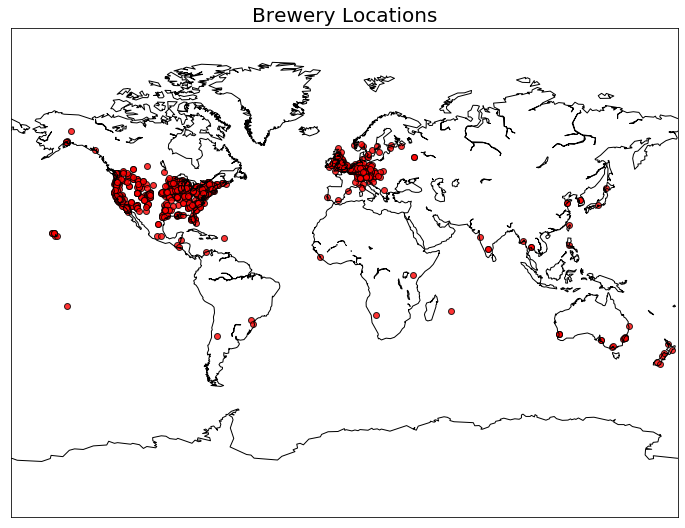

In [36]:
# Use basemap
# to install run: conda install -c conda-forge basemap
# and maybe: conda install -c conda-forge basemap-data-hires
# a restart might also be necessary

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(12, 9))
m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()

x = breweries_geocode['longitude'].values.tolist()
y = breweries_geocode['latitude'].values.tolist()

m.scatter(x, y, latlon=True, marker="o", c='red', alpha=0.8, edgecolor='black')

plt.title('Brewery Locations', fontsize=20)
plt.show()

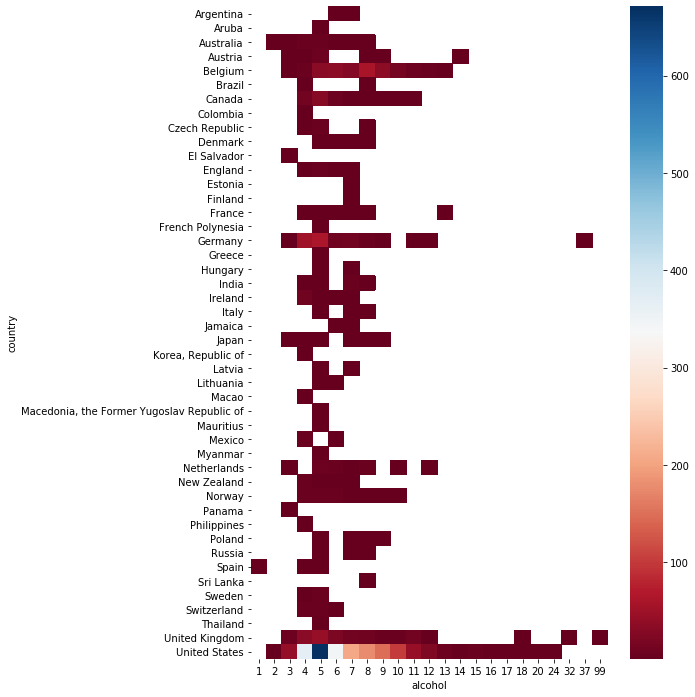

In [45]:
import seaborn as sns

conn = sqlite3.connect('beer.db')
df = pd.read_sql_query('''SELECT bw.country, cast(b.abv as integer) as 'alcohol', count(b.id) as 'count'
                            FROM beers b 
                            LEFT JOIN breweries bw ON b.brewery_id = bw.id 
                            WHERE cast(b.abv as integer) > 0
                            GROUP BY bw.country, cast(b.abv as integer) ORDER BY bw.country''', conn)

# close db connection
conn.close()
df.head()

heatmap1_data = pd.pivot_table(df, values='count', 
                     index=['country'], 
                     columns='alcohol')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap1_data, cmap="RdBu")

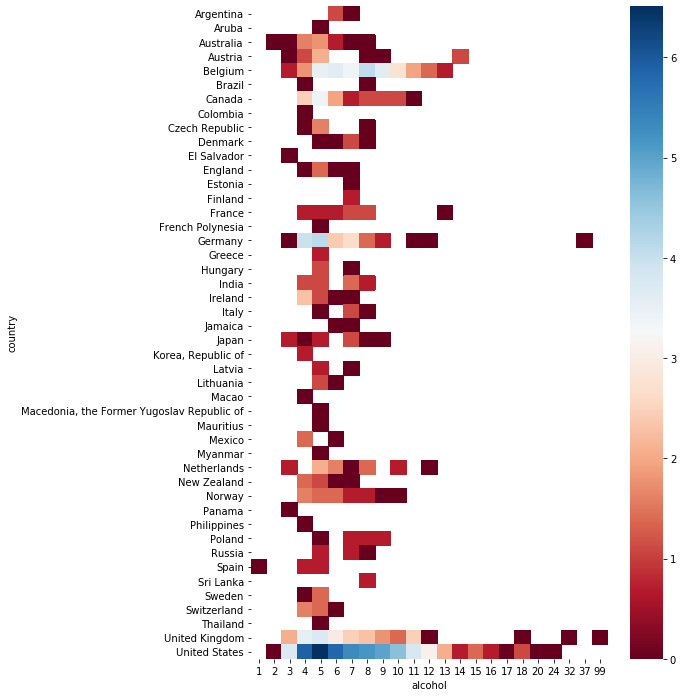

In [41]:
df['log_count'] = np.log(df['count'])
heatmap1_data = pd.pivot_table(df, values='log_count', 
                     index=['country'], 
                     columns='alcohol')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap1_data, cmap="RdBu")